# Наполеон задумался о результатах контрольной 1 по ноду :)


<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Napoleon_Paul_Delaroche.jpg" height="500" width="400"> 


In [2]:
import numpy as np
import pandas as pd

from scipy import stats # more style :)

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

# Задаченька 1 или Французы клюют только на французских покойников

Девятый семинар по наукам о данных мы начинаем на неделе с 18 мая. В этот день корсиканец Наполеон был провозглашён императором Франции. А нам настала пора загрузить файлик с оценками по ноду, `nod_2020-05-17.csv`.



In [9]:
nod = pd.read_csv('nod_2020-05-17.csv')
nod.head()

,group,fio,contest_login,hse_mail,alt_mail,a1_coursera,a2_coursera,b_coursera,coursera,d1a,...,d3b,d3c,d3,k3a,k3b,k3c,k3,nakop,total,final
0,БЭК181,Аверьянов Николай Егорович,eds_python_2020_1,neaveryanov@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.520000,5.0
1,БЭК181,Алиев Эльнур Гашимович,eds_python_2020_2,egaliev_1@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.840000,4.0
2,БЭК181,Алтунина Анастасия Игоревна,eds_python_2020_3,aialtunina@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.140000,4.0
3,БЭК181,Байкалова Дарья Александровна,eds_python_2020_4,dabaykalova@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000,4.0
4,БЭК181,Васьков Алексей Васильевич,eds_python_2020_5,avvaskov@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.566667,4.0


In [13]:
nod.dropna(subset=["k1"], inplace=True)

In [12]:
# создалась копия, пытались выкинуть пропуски из неё, мы балбесы!
# nod[["fio", "k1"]].dropna(subset=["k1"], inplace=True)

__а)__ Постройте гистограмму результатов за первую контрольную, переменная `k1` :)

In [18]:
# https://docs.scipy.org/doc/scipy/reference/stats.html

norm_rv = stats.norm()  # N(0,1)
norm_rv.ppf(0.975)      # квантили

1.959963984540054

In [19]:
norm_rv.pdf(1) # значение f(1)

0.24197072451914337

In [20]:
norm_rv.cdf(1) # значение F(1)

0.8413447460685429

In [21]:
# X ~ N(0,1)
# P(1 < X < 3) = F(3) - F(1)
norm_rv.cdf(3) -  norm_rv.cdf(1) 

0.15730535589982697

In [ ]:
norm_rv.rvs(10) # выборка из 10 наблюдений

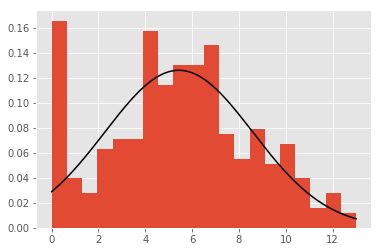

In [44]:
x = nod.k1.values

mu_hat = x.mean()
sd_hat = x.std()

xs = np.linspace(0, 13, 300)
ys = stats.norm(loc=mu_hat, scale=sd_hat).pdf(xs)

nod.k1.hist(bins=20, density=True)
plt.plot(xs, ys, color="black");

In [27]:
stats.kstest(x, 'norm') # мизирное pvalue => отвергается! (НО МЫ ЗАБЫЛИ ПАРАМЕТРЫ РАСПРЕДЕЛЕНИЯ)

KstestResult(statistic=0.8259678167697695, pvalue=2.181448352145223e-294)

In [26]:
# вернули параметры
stats.kstest(x, 'norm', args=(mu_hat, sd_hat))

KstestResult(statistic=0.05253420900574082, pvalue=0.22432337928122123)

In [28]:
# то же самое
stats.kstest((x - mu_hat)/sd_hat, 'norm')

KstestResult(statistic=0.05253420900574082, pvalue=0.22432337928122123)

In [ ]:
# H_0:  X ~ N(0,1)
# H_A:  нет 

# Тест Колмогорова-Смирнова сказал, что гипотеза не отвергается

Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений!

__б)__ Постройте примерный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную.

$$
\left[\bar x - z_{crit} \sqrt{\frac{\hat\sigma^2}{n}} ; \bar x + z_{crit} \sqrt{\frac{\hat\sigma^2}{n}} \right]
$$

In [32]:
# Везде предполагаю, что выборка нормальная => z_crit берём из распределения Стьюдента
# С БЭК-185 мы пользовались ЦПТ

stats.t(100).ppf(0.975) # квантиль для Стьюдента для 100 степеней свободы (101 наблюдения)

1.9839715184496334

In [33]:
stats.norm().ppf(0.975) # квантиль для стандартного нормального

1.959963984540054

In [36]:
# ТОЧНЫЙ ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ
alpha = 0.05

mu_hat = x.mean()
var_hat = x.var()
n = x.size

t_crit = stats.t(n-1).ppf(1 - alpha/2)
left = mu_hat - t_crit * np.sqrt(var_hat/n)
right = mu_hat + t_crit * np.sqrt(var_hat/n)

print(f"Доверительный интервал [{left:.3}; {right:.3}] ширины {right - left:.3}")

Доверительный интервал [5.12; 5.75] ширины 0.63


In [37]:
# Асимптотический ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ
alpha = 0.05

mu_hat = x.mean()
var_hat = x.var()
n = x.size

z_crit = stats.norm.ppf(1 - alpha/2)
left = mu_hat - z_crit * np.sqrt(var_hat/n)
right = mu_hat + z_crit * np.sqrt(var_hat/n)

print(f"Доверительный интервал [{left:.3}; {right:.3}] ширины {right - left:.3}")

Доверительный интервал [5.12; 5.75] ширины 0.628


In [38]:
n - 1  # t(n) => N(0,1) при n -> infinity  (смотрели на предыдущем семинаре)

389

In [41]:
mu_hat = x.mean()
sd_hat = np.sqrt(x.var()/n)

# пакетны способ пострить асимптотический 95% доверительный интервал 
stats.norm.interval(0.95, loc=mu_hat, scale=sd_hat)

(5.117082820375691, 5.745481282188411)

In [63]:
def norm_conf_int(alpha, mu_hat, sd_hat, margin=1):
    plt.figure(figsize=(10,5))
    xs = np.linspace(mu_hat - margin, mu_hat + margin, 100)
    pdf = stats.norm(mu_hat, sd_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = stats.norm.interval(1 - alpha, loc=mu_hat, scale=sd_hat)

    y_max = plt.ylim()[1]
    plt.axvline(left, color="blue", linestyle='dashed', lw=2)
    plt.text(left-0.2, 0.8*y_max, f"{left:.3}", color="blue", fontsize=18)
    xq = np.linspace(mu_hat-margin, left)
    yq = stats.norm(mu_hat, sd_hat).pdf(xq)
    plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    y_max = plt.ylim()[1]
    plt.axvline(right, color="blue", linestyle='dashed', lw=2)
    plt.text(right+0.05, 0.8*y_max, f"{right:.3}", color="blue", fontsize=18)
    xq = np.linspace(right, mu_hat+margin)
    yq = stats.norm(mu_hat, sd_hat).pdf(xq)
    plt.fill_between(xq, 0, yq, color='blue', alpha=0.3);
    return left, right

(5.018354266636531, 5.844209835927571)

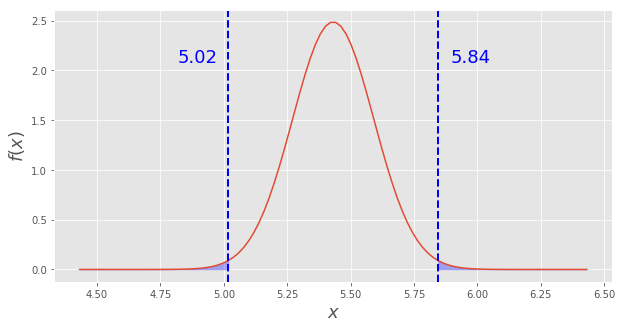

In [65]:
alpha = 0.01
mu_hat = x.mean()
sd_hat = np.sqrt(x.var()/n)

norm_conf_int(alpha, mu_hat, sd_hat)

Разобьём наши наблюдения на две группы: Ангелы и Демоны. У Ангелов `d1fraud == 0`, у Демонов `d1fraud > 0`.

__в)__ Постройте на общем фоне гистограмму распределения оценок за первую контрольную у Ангелов и Демонов. 

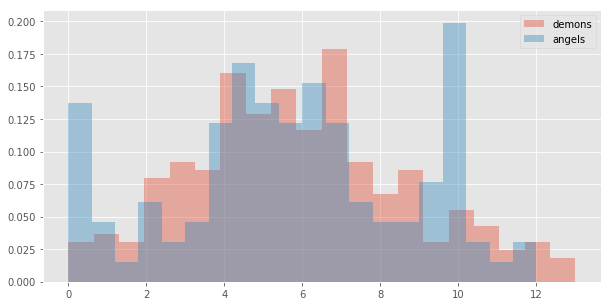

In [75]:
plt.figure(figsize=(10,5))
nod[nod.d1fraud > 0].k1.hist(alpha=0.4, bins=20, density=True, label="demons")
nod[nod.d1fraud == 0].k1.hist(alpha=0.4, bins=20, density=True, label="angels")
plt.legend();

__г)__ Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у Ангелов и Демонов. Без предположения о равенстве дисперсий.

$$
\left[\bar x - \bar y - z_{crit} \sqrt{\frac{\hat\sigma_x^2}{n_x} + \frac{\hat\sigma_y^2}{n_y}} ; \bar x - \bar y + z_{crit} \sqrt{\frac{\hat\sigma_x^2}{n_x} + \frac{\hat\sigma_y^2}{n_y}} \right]
$$

In [94]:
x = nod[nod.d1fraud > 0].k1
y = nod[nod.d1fraud == 0].k1

x.mean(), y.mean()

(5.897600000000001, 5.759633027522935)

(-0.532833905384929, 0.8087678503390602)

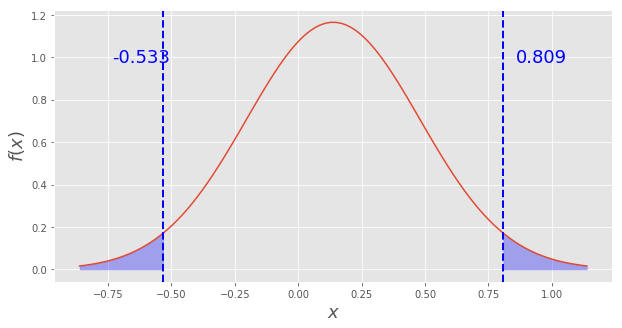

In [95]:
alpha = 0.05

diff = x.mean() - y.mean()
diff_sd = np.sqrt(x.var()/x.size + y.var()/y.size)

# асимптотический интервал для разности средних двух независимых выборок
norm_conf_int(alpha, diff, diff_sd)

In [96]:
# H_0 : m_a = m_d   <=>   m_a - m_d  = 0
# H_A : ma != m_d   <=>   m_a - m_d != 0

z_obs = diff/diff_sd
z_obs # наблюдаемое значение

0.40311559813836373

In [97]:
alpha = 0.05 
z_crit = stats.norm.ppf(1 - alpha/2)
z_crit  # критическое значение 

1.959963984540054

In [89]:
#  -z_crit < z_obs <  z_crit => гипотеза не отвергается

In [98]:
# Задание: сделать дополнительный аргумент, который выбирает альтернативу 

# m_a != m_d  - two-sided
# m_a < m_d   - less
# m_a > m_d   - right

def norm_mean_test(mu_hat, sd_hat, mu_0 = 0, alpha=0.05, margin=3):
    
    z_obs = (mu_hat - mu_0)/sd_hat
    z_crit = stats.norm( ).ppf(1 - alpha/2)

    plt.figure(figsize = (10, 5))

    x = np.linspace(-margin, margin, 100)
    pdf = norm_rv.pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=18)
    plt.xlabel("$x$", fontsize=18)
    y_max = plt.ylim()[1]

    # Критические значения статистки 
    plt.axvline(-z_crit, color="blue", linestyle="--", lw=2)
    plt.text(-z_crit-0.7, 0.8*y_max, f"{-z_crit:.3}", color="blue", fontsize=16)
    xq = np.linspace(-margin, -z_crit)
    yq = norm_rv.pdf(xq)
    plt.fill_between(xq, 0, yq, color="blue", alpha=0.2)

    plt.axvline(z_crit, color="blue", linestyle="--", lw=2)
    plt.text(z_crit+0.05, 0.8*y_max, f"{z_crit:.3}", color="blue", fontsize=16)
    xq = np.linspace(z_crit, margin)
    yq = norm_rv.pdf(xq)
    plt.fill_between(xq, 0, yq, color="blue", alpha=0.2)

    # Наблюдаемые значения статистики
    plt.axvline(-z_obs, color="red", linestyle="--", lw=2)
    plt.text(-z_obs-0.7, 0.8*y_max, f"{-z_obs:.3}", color="red", fontsize=16)
    xq = np.linspace(-margin, -z_obs)
    yq = norm_rv.pdf(xq)
    plt.fill_between(xq, 0, yq, color="red", alpha=0.2)

    plt.axvline(z_obs, color="red", linestyle="--", lw=2)
    plt.text(z_obs+0.05, 0.8*y_max, f"{z_obs:.3}", color="red", fontsize=16)
    xq = np.linspace(z_obs, margin)
    yq = norm_rv.pdf(xq)
    plt.fill_between(xq, 0, yq, color="red", alpha=0.2)

    pvalue = 2*norm_rv.cdf(-z_obs)
    return pvalue

0.6868631862796919

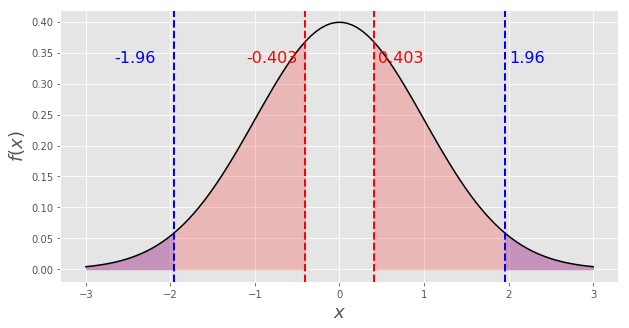

In [100]:
alpha = 0.05

diff = x.mean()-y.mean()
diff_sd = np.sqrt(x.var()/x.size + y.var()/y.size)

norm_mean_test(diff, diff_sd, mu_0 = 0, alpha=0.05, margin=3)

__д)__ Как изменятся результаты, если границу между Ангелами и Демонами провести по `d1fraud < 2.5` и `d1fraud > 2.5`?

0.6315581375559505

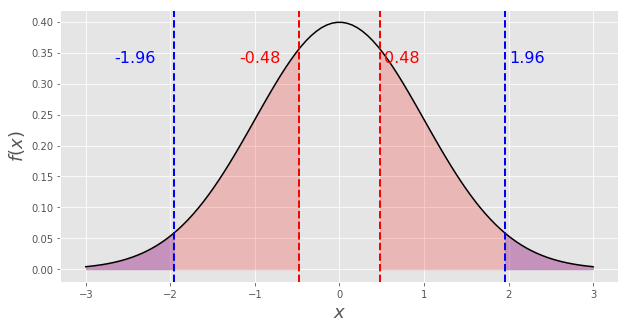

In [110]:
x1 = nod[nod.d1fraud >= 2.5].k1
y1 = nod[nod.d1fraud < 2.5].k1

alpha = 0.05
diff = y1.mean() - x1.mean()
diff_sd = np.sqrt(x1.var()/x1.size + y1.var()/y1.size)

norm_mean_test(diff, diff_sd, mu_0 = 0, alpha=0.05, margin=3)

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов.

__е)__ Проверьте гипотезу об одинаковой нервозности Ангелов и Демонов на уровне значимости $5\%$.

In [103]:
x.var(), y.var()

(7.949472128514056, 9.30187393815834)

In [104]:
F_obs = x.var()/y.var()
n,m = x.size, y.size
F_obs

0.8546097465268333

In [105]:
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha/2, n - 1, m - 1)
F_crit

1.3923435659305086

__ё)__ Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Нарисуйте симпатичную картинку для корреляционной матрицы по задачам первой контрольной для всех наблюдений, отдельно для Ангелов и Демонов. 

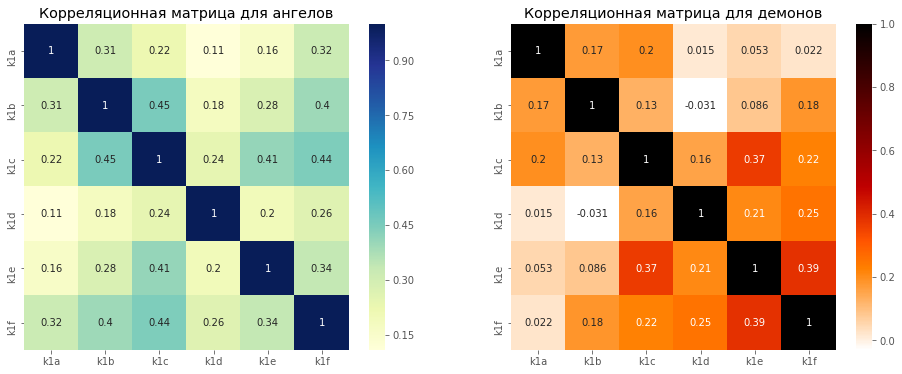

In [124]:
tasks = ['k1a', 'k1b', 'k1c', 'k1d', 'k1e', 'k1f']

corr_angels = nod[nod.d1fraud == 0][tasks].fillna(0).corr()
corr_demons = nod[nod.d1fraud > 0][tasks].fillna(0).corr()

_, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_angels, cmap="YlGnBu", annot=True, ax = axes[0])
sns.heatmap(corr_demons , cmap="gist_heat_r", annot=True, ax = axes[1])

axes[0].set_title("Корреляционная матрица для ангелов")
axes[1].set_title("Корреляционная матрица для демонов");

# Симуляционная задачулька 2 про повторное тестирование

Сказка про то, что последовательное применение тестов без корректировки — это не очень хорошо :)

Жизнь исследователя Винни-Пуха прекрасна. Наблюдений много, гипотеза о равенстве ожиданий верна, а наблюдения — нормальны. 

А именно, величины $X_1$, ..., $X_{n}$ независимы и нормальны $N(0;1)$, величины $Y_1$, ..., $Y_n$ независимы и нормальны $N(0;2)$. И пусть $n=200$.



Винни-Пух правда этого ничего не знает, потому что у него в голове опилки, и тестирует сначала гипотезу о равенстве дисперсий двух выборок на уровне значимости $5\%$.

__а)__ Проведите $10^6$ экспериментов, то есть $10^6$ раз попробуйте за Винни-Пуха проверить гипотезу. Хорошо бы $10^8$, но оттестируйте сначала свой код на $10^6$. 

Постройте гистограмму распределения тестовой статистики о равенстве дисперсий. В скольки процентах случаев гипотеза о равенстве дисперсий отвергнута? 

In [ ]:
# решение

__б)__ Если гипотеза о равенстве дисперсий не отвергается, то Винни использует $t$-статистику для проверки гипотезы о равенстве ожиданий при равенстве дисперсий. 

Для тех экспериментов, в которых гипотеза о равенстве дисперсий не отверглась, проверьте гипотезу о равенстве ожиданий на уровне значимости $5\%$. 

Постройте гистограмму распределения $t$-статистики. В скольки процентах случаев гипотеза о равенстве ожиданий отвергнута?

In [ ]:
# решение

__в)__ Словами объясните, почему нехорошо сначала тестировать на равенство дисперсий, а потом на равенство средних при равных дисперсиях, если на первом шаге гипотеза $H_0$ не отверглась. 

# Задачулька 3 о мимимишных мышках

[https://nplus1.ru/news/2018/05/11/mice-trolley](https://nplus1.ru/news/2018/05/11/mice-trolley) 

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей; следует, однако, уточнить, что удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$ если реальную, $2$ если на бумаге
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили кучу логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Этому добру вас будут учить на эконометрике, мы пойдём простым и не совсем правильным путём и будем проверять гипотезы в лоб. 

In [12]:
df = pd.read_csv("mouse.csv", sep="\t")
df.head()

,STUDY,AGE,GENDER,DECISION,DEO1,DEO2,DEO3,DEO4,DEO5,DEO6,...,AE,MOUSE1,MOUSE2,MOUSE3,MOUSE,DOUBT,OTHERCHOICE,UNCOMFORTABLE,NOSHOCK,RT
0,1,38,1,NaN,2,2,2,1,2,2,...,5.000000,6.0,5.0,5.0,5.333333,NaN,NaN,NaN,NaN,NaN
1,1,22,1,NaN,1,2,2,1,2,1,...,5.727273,5.0,6.0,6.0,5.666667,NaN,NaN,NaN,NaN,NaN
2,1,39,1,NaN,1,1,3,5,3,1,...,5.545455,6.0,6.0,6.0,6.000000,NaN,NaN,NaN,NaN,NaN
3,1,21,0,1.0,2,3,3,3,3,2,...,5.136364,4.0,7.0,7.0,6.000000,2.0,0.0,6.0,80.0,9.212427
4,1,20,0,1.0,4,2,2,2,2,2,...,4.181818,4.0,6.0,6.0,5.333333,4.0,0.0,6.5,75.0,17.071711


__Отдавайте себе отчёт о предпосылках теста, который вы используете.__


__а)__ Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чащи принимают решение нажать кнопку: в реальной или на бумаге?

In [ ]:
# решение

__б)__ Правда ли, что женщины и мужчины принимают решению о нажатии на кнопку одинаково часто? А на бумаге?

In [ ]:
# решение

__в)__ Правда ли, что женщины намного кровожаднее мужчин и жмут на кнопку гораздо быстрее?

In [ ]:
# решение

__в)__ Предположим, что дисперсия времени нажатия на кнопку определяется эмоциональностью и романтичностью индивида. Правда ли, что романтичность женщин равна романтичности мужчин? 

In [ ]:
# решение


<img src="https://pp.userapi.com/c852220/v852220032/14dce1/r1zXBIig4B8.jpg" height="300" width="600"> 